<a href="https://colab.research.google.com/github/vperezguti/Resp-Experto-data---caso-practico/blob/main/Modelo_VGG19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Modelo VGG19
Me baso en la página:
https://medium.com/mlearning-ai/using-transfer-learning-with-vgg19-to-classify-grapevines-leaves-part-1-e78b36a54221

In [ ]:
import os
import cv2
import numpy as np

#Encoding and Split data into Train/Test Sets
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

#Tensorflow Keras CNN Model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D, Rescaling, RandomFlip, RandomRotation, RandomZoom
from tensorflow.keras.layers import MaxPool2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from keras.utils.vis_utils import plot_model
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping, TensorBoard

#Plot Images
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

folder_dir = '/content/drive/MyDrive/Curso Data Science/mi_proyecto/images'
import random

Mounted at /content/drive


In [ ]:
data_dir = '/content/drive/MyDrive/Curso Data Science/mi_proyecto/images'
img_height = 224
img_width = 224
batch_size = 32
    
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)
    
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)


class_names = train_ds.class_names

Found 1148 files belonging to 10 classes.
Using 919 files for training.
Found 1148 files belonging to 10 classes.
Using 229 files for validation.


In [ ]:
model_VGG19 = tf.keras.models.load_model('/content/drive/MyDrive/Curso Data Science/mi_proyecto/model_VGG19.h5')

In [ ]:
pre_trained_model = VGG19(weights='imagenet', include_top=False, input_shape=(224,224,3))
for layer in pre_trained_model.layers:
  print(layer.name)
  layer.trainable = False

input_1
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_conv4
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_conv4
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_conv4
block5_pool


In [ ]:
model = Sequential([
    pre_trained_model,
    MaxPool2D((2,2) , strides = 2),
    Flatten(),
    Dense(10 , activation='softmax')])
model.compile(optimizer = "adam" , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 max_pooling2d (MaxPooling2D  (None, 3, 3, 512)        0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 10)                46090     
                                                                 
Total params: 20,070,474
Trainable params: 46,090
Non-trainable params: 20,024,384
_________________________________________________________________


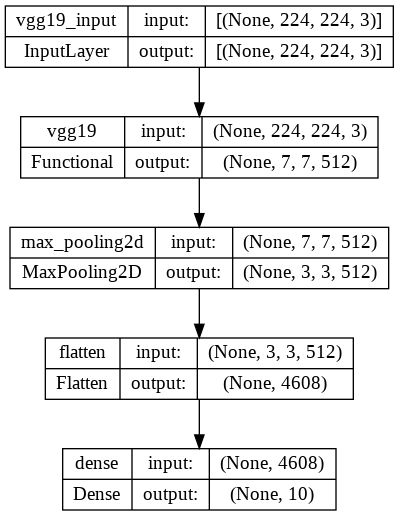

In [ ]:
plot_model(model, to_file='model.png', show_shapes=True,show_layer_names=True)

In [ ]:
model_name = 'model_VGG19.h5'
checkpointer = ModelCheckpoint(model_name, verbose=1, save_best_only=True) # Salvar os melhores modelos
early_stopper = EarlyStopping(patience = 5, monitor='val_loss')
learning_rate_reduction = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.3,
    min_lr=0.000001)
callbacks = [checkpointer, early_stopper, learning_rate_reduction]
epochs = 15
batch_size = 64
history = model.fit(
    train_ds, 
    batch_size = batch_size , 
    epochs = epochs , 
    validation_data=val_ds,
    callbacks = [callbacks])

Epoch 1/15
29/29 [==============================] - ETA: 0s - loss: 22.7401 - accuracy: 0.3482 
Epoch 1: val_loss improved from inf to 13.56916, saving model to model_VGG19.h5
29/29 [==============================] - 773s 27s/step - loss: 22.7401 - accuracy: 0.3482 - val_loss: 13.5692 - val_accuracy: 0.5066 - lr: 0.0010
Epoch 2/15
29/29 [==============================] - ETA: 0s - loss: 3.4830 - accuracy: 0.8030 
Epoch 2: val_loss improved from 13.56916 to 9.55765, saving model to model_VGG19.h5
29/29 [==============================] - 767s 27s/step - loss: 3.4830 - accuracy: 0.8030 - val_loss: 9.5577 - val_accuracy: 0.5852 - lr: 0.0010
Epoch 3/15
29/29 [==============================] - ETA: 0s - loss: 0.8629 - accuracy: 0.9108 
Epoch 3: val_loss did not improve from 9.55765
29/29 [==============================] - 768s 27s/step - loss: 0.8629 - accuracy: 0.9108 - val_loss: 9.9175 - val_accuracy: 0.6026 - lr: 0.0010
Epoch 4/15
29/29 [==============================] - ETA: 0s - loss: 0

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(11)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# Creamos un diccionario con las fotos
datos_test = {'Agaricus campestris': 'https://www.mycodb.fr/photos/Agaricus_campestris_2003_dr_1.jpg', 
              'Macrolepiota procera': 'https://www.mycodb.fr/photos/Macrolepiota_procera_2014_df_1.jpg', 
              'Amanita muscaria': 'https://www.mycodb.fr/photos/Amanita_muscaria_2005_ov_2.jpg', 
              'Amanita phalloides': 'https://www.mycodb.fr/photos/Amanita_phalloides_2011_jpa_1.jpg', 
              'Boletus edulis': 'https://www.mycodb.fr/photos/Boletus_edulis_2007_ov_1.jpg', 
              'Lepista nuda': 'https://www.mycodb.fr/photos/Lepista_nuda_2019_db_1.jpg', 
              'Marasmius oreades': 'https://www.mycodb.fr/photos/Marasmius_oreades_2000_dr_1.jpg', 
              'Pleurotus ostreatus': 'https://www.mycodb.fr/photos/Pleurotus_ostreatus_2015_hm_1.jpg', 
              'Tricholoma portentosum': 'https://www.mycodb.fr/photos/Tricholoma_portentosum_2014_td_3.jpg', 
              'Rubroboletus satanas': 'https://www.mycodb.fr/photos/Rubroboletus_satanas_2006_ar_1.jpg'}

In [ ]:
#Crearemos una función para el cálculo 
def predict_seta(img_height, img_width, clases, modelo, img_url):
  img_path = tf.keras.utils.get_file('mushroom_image'+str(random.randint(0, 999)), origin=img_url)

  img = tf.keras.preprocessing.image.load_img(
      img_path, target_size=(img_height, img_width, 3)
  )

#plt.imshow(img)

  img_array = tf.keras.preprocessing.image.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0)  # Create a batch

  predictions = modelo.predict(img_array)

  predictions_sigmoid = tf.nn.sigmoid(predictions)
  score = tf.nn.softmax(predictions[0])

  return clases[np.argmax(score)], img

1/1 [==============================] - 1s 713ms/step


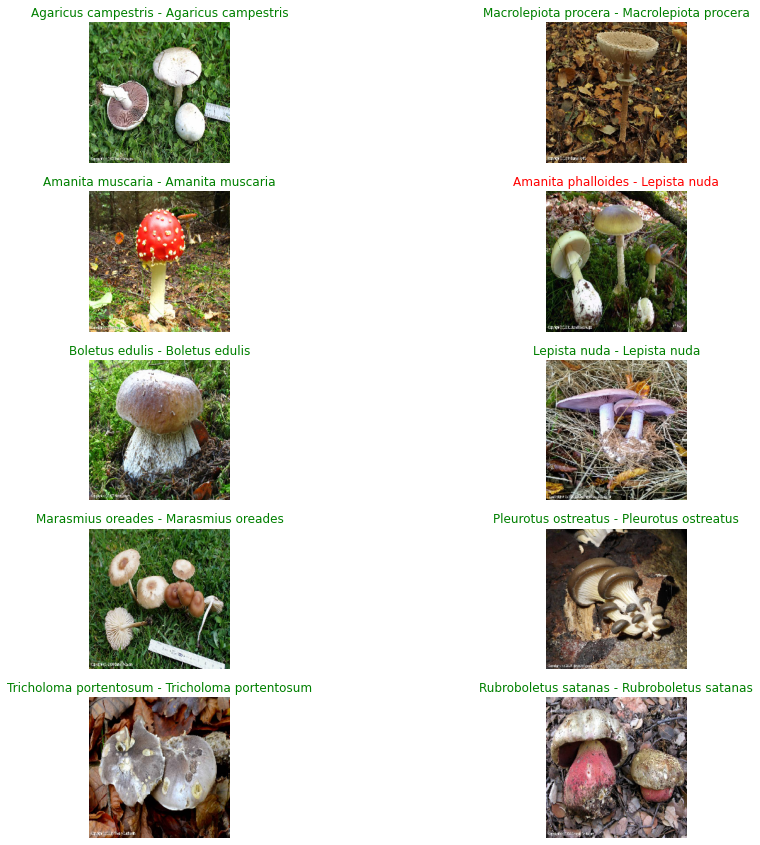

In [ ]:
predict_dict = {}
plt.figure(figsize=(15,15))
i = 1
for nombre, url in datos_test.items():
  prediccion = predict_seta(img_height, img_width, class_names, model_VGG19, url)
  predict_dict[nombre] = prediccion[0]
  ax = plt.subplot(5,2,i)
  plt.imshow(prediccion[1])
  if nombre == prediccion[0]:
    plt.title(nombre+" - "+prediccion[0], color = 'g')
  else:  
    plt.title(nombre+" - "+prediccion[0], color = 'r')
  plt.axis("off")
  i += 1
#print(predict_dict)